<a href="https://colab.research.google.com/github/omkarsathe808/DLNN/blob/main/dog_and_cat_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds



In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Download + prepare the dataset (first time takes a few mins)
(ds_train, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],  # 80% train, 20% test
    with_info=True,
    as_supervised=True,  # returns (image, label)
)

print(ds_info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.22NYI1_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/root/tensorflow_datasets/cats_vs_dogs/4.0.1',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings 

In [ ]:
IMG_SIZE = (160, 160)  # MobileNetV2 default input size
BATCH_SIZE = 64
AUTOTUNE = tf.data.AUTOTUNE

def format_image(image, label):
    image = tf.image.resize(image, IMG_SIZE)
    image = tf.cast(image, tf.float32) / 127.5 - 1.0  # scale to [-1, 1]
    return image, label

train_ds = ds_train.map(format_image, num_parallel_calls=AUTOTUNE)
test_ds  = ds_test.map(format_image, num_parallel_calls=AUTOTUNE)

train_ds = train_ds.shuffle(1000).batch(BATCH_SIZE).prefetch(AUTOTUNE)
test_ds  = test_ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)


In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

# Load base model (pretrained on ImageNet)
base_model = MobileNetV2(
    input_shape=IMG_SIZE + (3,),
    include_top=False,   # remove final classification head
    weights="imagenet"
)

base_model.trainable = False  # freeze weights initially

# Build model
inputs = layers.Input(shape=IMG_SIZE + (3,))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)  # binary classification
model = models.Model(inputs, outputs)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

# Load base model (pretrained on ImageNet)
base_model = MobileNetV2(
    input_shape=IMG_SIZE + (3,),
    include_top=False,   # remove final classification head
    weights="imagenet"
)

base_model.trainable = False  # freeze weights initially

# Build model
inputs = layers.Input(shape=IMG_SIZE + (3,))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)  # binary classification
model = models.Model(inputs, outputs)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=5  # fast training
)


Epoch 1/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 76s 194ms/step - accuracy: 0.9032 - loss: 0.2176 - val_accuracy: 0.9815 - val_loss: 0.0548
Epoch 2/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 31s 102ms/step - accuracy: 0.9795 - loss: 0.0586 - val_accuracy: 0.9828 - val_loss: 0.0483
Epoch 3/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 30s 98ms/step - accuracy: 0.9815 - loss: 0.0508 - val_accuracy: 0.9839 - val_loss: 0.0455
Epoch 4/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 46s 117ms/step - accuracy: 0.9816 - loss: 0.0470 - val_accuracy: 0.9832 - val_loss: 0.0459
Epoch 5/5
291/291 ━━━━━━━━━━━━━━━━━━━━ 30s 98ms/step - accuracy: 0.9830 - loss: 0.0480 - val_accuracy: 0.9832 - val_loss: 0.0466


In [ ]:
base_model.trainable = True

# Fine-tune only the last 30 layers
for layer in base_model.layers[:-30]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),  # lower LR
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_fine = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=1
)


291/291 ━━━━━━━━━━━━━━━━━━━━ 62s 152ms/step - accuracy: 0.9133 - loss: 0.2304 - val_accuracy: 0.9665 - val_loss: 0.1147


In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.4f}")


73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.9679 - loss: 0.1063
Test Accuracy: 0.9665


2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 40ms/step


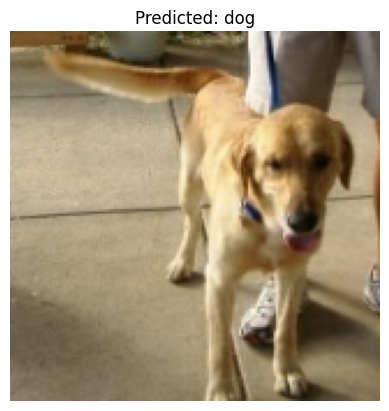

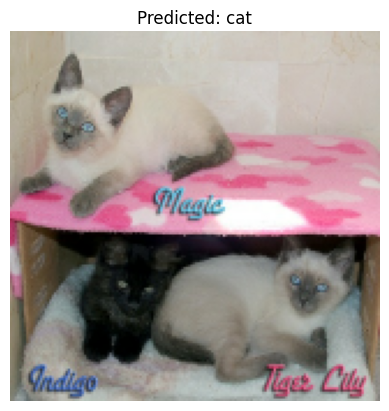

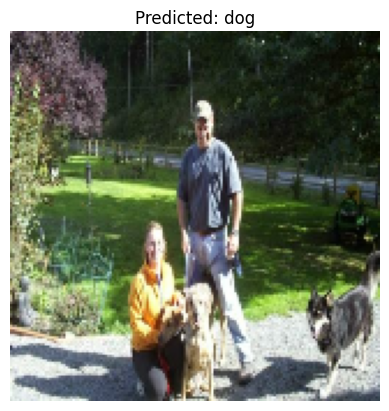

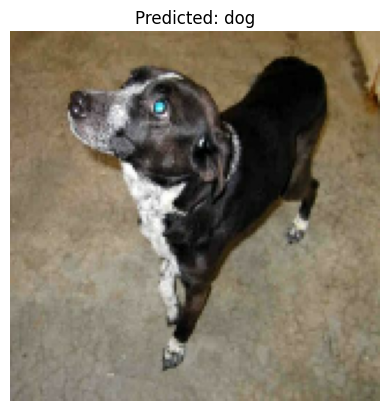

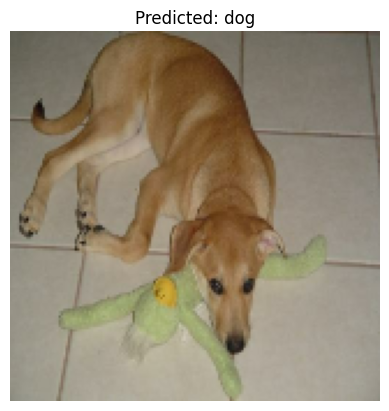

In [ ]:
import matplotlib.pyplot as plt

for images, labels in test_ds.take(1):
    preds = model.predict(images)
    for i in range(5):
        plt.imshow((images[i].numpy()+1)/2)  # rescale back to [0,1]
        label = "dog" if preds[i] > 0.5 else "cat"
        plt.title(f"Predicted: {label}")
        plt.axis("off")
        plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dog.jpeg to dog.jpeg


1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


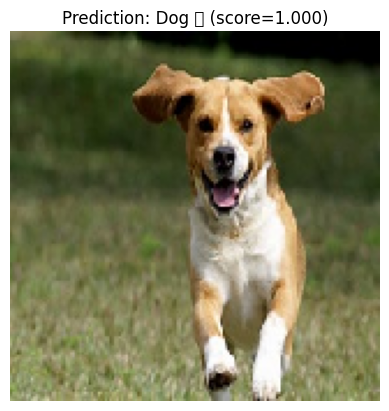

In [ ]:
MODEL_TYPE = "mobilenet"   # change to "cnn" if you trained from scratch

IMG_SIZE = (160, 160) if MODEL_TYPE == "mobilenet" else (180, 180)

def prepare_image(path):
    img = tf.keras.utils.load_img(path, target_size=IMG_SIZE)
    img_array = tf.keras.utils.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    if MODEL_TYPE == "mobilenet":
        img_array = img_array / 127.5 - 1.0  # scale [-1,1]
    else:
        img_array = img_array / 255.0        # scale [0,1]
    return img_array, img

# Run predictions on uploaded images
for fname in uploaded.keys():
    img_array, display_img = prepare_image(fname)
    pred = model.predict(img_array)[0][0]   # sigmoid output
    label = "Dog 🐶" if pred > 0.5 else "Cat 🐱"

    plt.imshow(display_img)
    plt.title(f"Prediction: {label} (score={pred:.3f})")
    plt.axis("off")
    plt.show